In [1]:
import sys
dir_repo = '../../../'
sys.path.append(dir_repo)

from galaxyZooNet.utils import get_config_from_yaml
from galaxyZooNet.dcgan_generator import DCGAN_Generator

! rm -rf /home/hhg/Research/galaxyClassify/repo/galaxyZooNet/experiment/TestDCGAN/

In [2]:
config = get_config_from_yaml(dir_repo+'configs/dcgan_test.yaml')
generator = DCGAN_Generator(config=config)


------ Parameters ------

exp_name : TestDCGAN
cuda : True
ngpu : 1
gpu_device : 1
workers : 2
dir_image : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo_kaggle/gz2_images/images
file_csv : /home/hhg/Research/galaxyClassify/catalog/galaxyZoo/zoo2/gz2_all_small_v2.csv
label_tag : label_8
num_classes : 8
class_weights : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
seed : 3
norm_mean : [0.094, 0.0815, 0.063]
norm_std : [0.1303, 0.11, 0.0913]
crop_size : 224
input_size : 64
n_channel : 3
n_zlatent : 50
n_filter_g : 64
n_filter_d : 64
num_epochs : 3
batch_size : 16
lr_g : 0.0002
lr_d : 0.0002
beta1 : 0.5
beta2 : 0.999
dir_output : /home/hhg/Research/galaxyClassify/repo/galaxyZooNet/experiment
nrow : 4

------ Prepare Data ------

Number of training galaxies: 1000 (63 batches)

------ Build Model ------

Number of trainable parameters
Generator  : 3167104
Discriminator  : 3167104


### --- test train --- 

In [3]:
from tqdm.notebook import tqdm

generator.train()


------ Create experiment directory ------

Training information will be stored at :
 	 /home/hhg/Research/galaxyClassify/repo/galaxyZooNet/experiment/TestDCGAN

[1/3 epoch] [1 iter]	 loss_D: 1.130 	 loss_G: 3.915	 D(x):0.496 	 D(G(z)): 0.290 / 0.022
	Training at epoch-0 | avg. netD loss: 0.092 | avg. netG loss 8.859
	Run time per epoch: 0m 2s
[2/3 epoch] [64 iter]	 loss_D: 0.232 	 loss_G: 23.740	 D(x):0.998 	 D(G(z)): 0.161 / 0.000
	Training at epoch-1 | avg. netD loss: 1.379 | avg. netG loss 13.731
	Run time per epoch: 0m 2s
[3/3 epoch] [127 iter]	 loss_D: 2.532 	 loss_G: 17.477	 D(x):0.995 	 D(G(z)): 0.895 / 0.000
	Training at epoch-2 | avg. netD loss: 0.704 | avg. netG loss 5.282
	Run time per epoch: 0m 2s


### --- check training logs ---

In [4]:
import pickle

In [5]:
print(f'open file : {generator.file_trainInfo}')
trainInfo = pickle.load(file = open(generator.file_trainInfo, 'rb'))

open file : /home/hhg/Research/galaxyClassify/repo/galaxyZooNet/experiment/TestDCGAN/trainInfo.pkl


In [6]:
trainInfo.keys()

dict_keys(['loss_G', 'loss_D', 'epoch_loss_G', 'epoch_loss_D', 'img_list', 'lr'])

In [7]:
trainInfo['img_list'][0].shape

torch.Size([3, 266, 266])

### training losses

In [8]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format='retina'

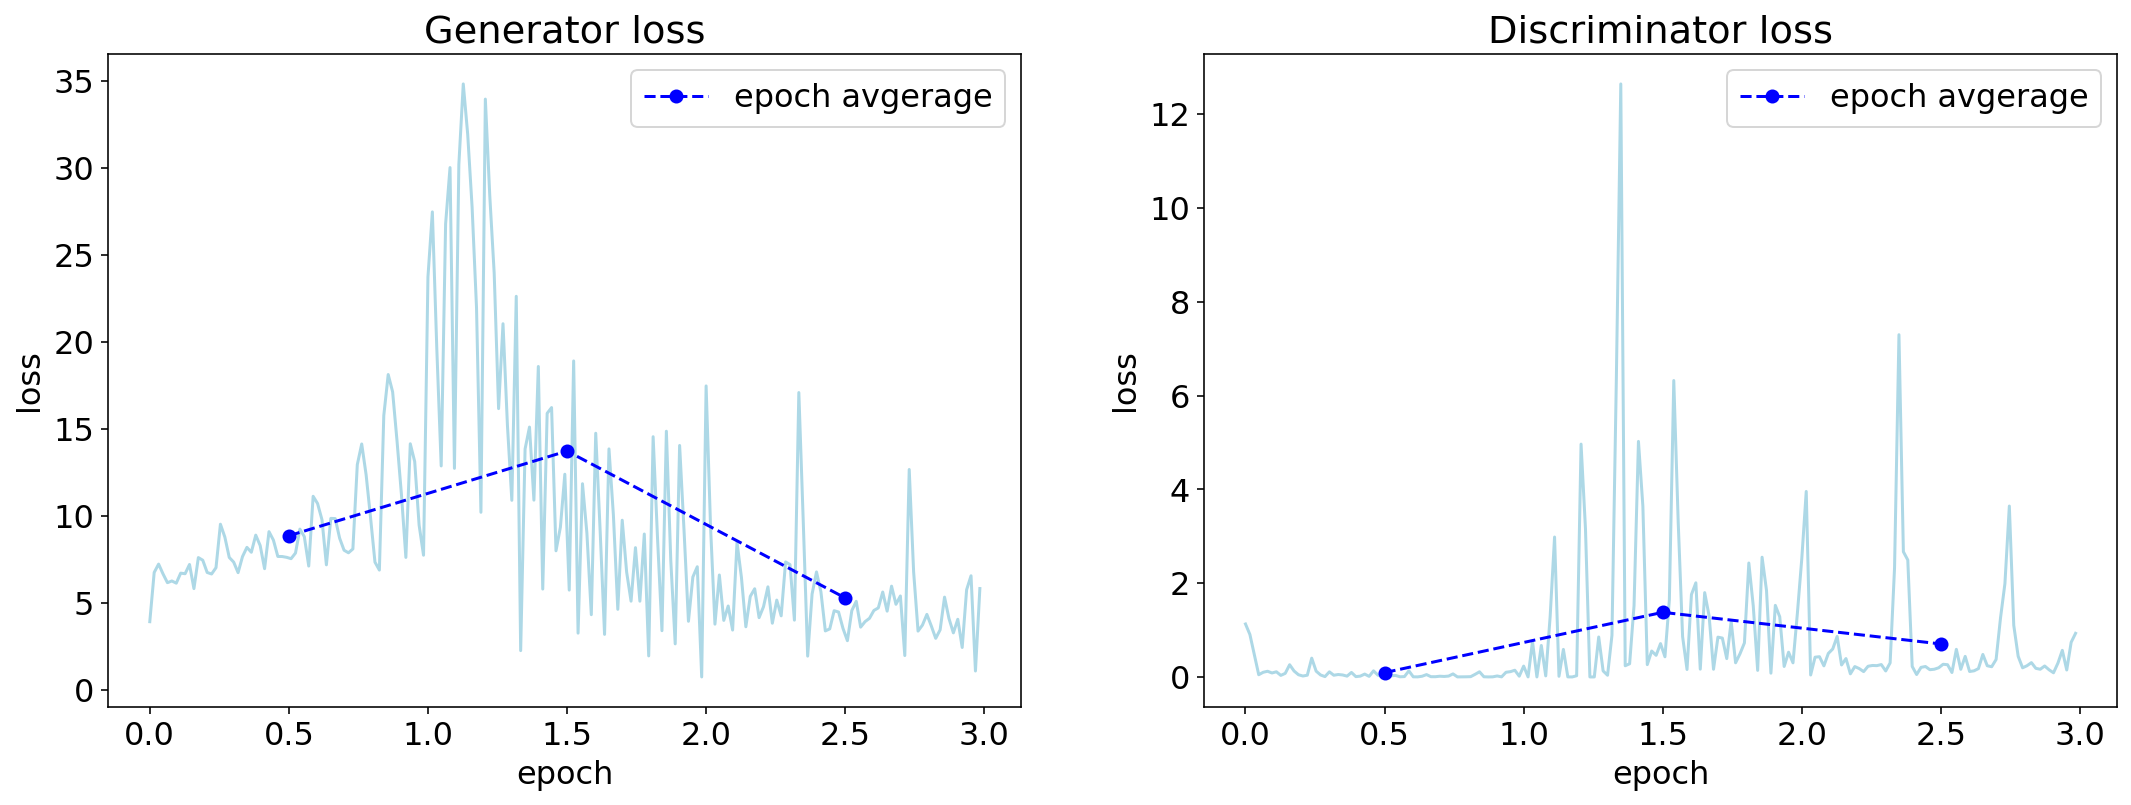

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
plt.rc('font', size=16)

iter_tick = np.array(range(len(trainInfo['loss_G'])))/len(generator.dataloader)

epoch_tick = np.array(range(len(trainInfo['epoch_loss_G'])))+0.5

ax[0].plot(iter_tick, trainInfo['loss_G'], color='lightblue')
ax[0].plot(epoch_tick, trainInfo['epoch_loss_G'], 'o--', label='epoch avgerage', color='b')

ax[1].plot(iter_tick, trainInfo['loss_D'], color='lightblue')
ax[1].plot(epoch_tick, trainInfo['epoch_loss_D'], 'o--', label='epoch avgerage', color='b')

ax[0].set_title(f'Generator loss')
ax[1].set_title(f'Discriminator loss')


for i in range(2):
    ax[i].set_ylabel('loss')
    ax[i].set_xlabel('epoch')
    ax[i].legend()

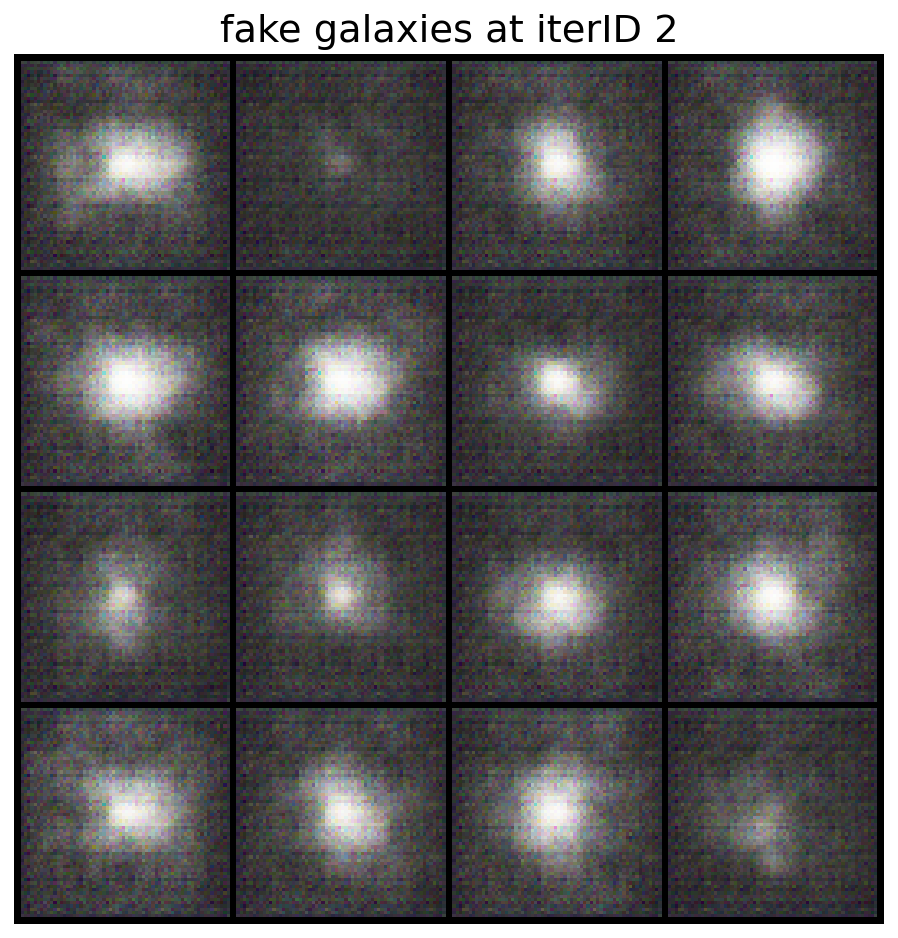

In [13]:
iterID = 2

fig = plt.figure(figsize=(8,8))
plt.axis("off")
plt.title(f'fake galaxies at iterID {iterID}')
plt.imshow(np.transpose(trainInfo['img_list'][iterID],(1,2,0)))

In [14]:
import matplotlib.animation as animation
from IPython.display import HTML

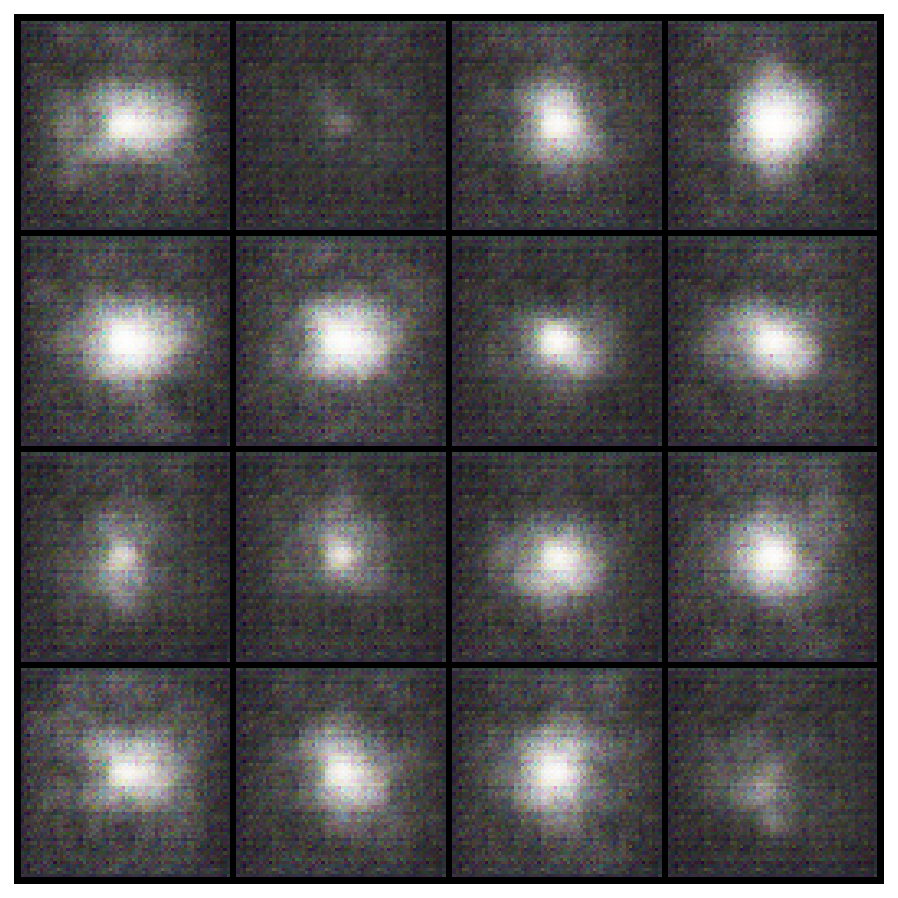

In [15]:
step_jump = 1

fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in trainInfo['img_list'][::step_jump]]
ani = animation.ArtistAnimation(fig, ims, interval=1000, repeat_delay=1000, blit=True)

HTML(ani.to_jshtml())

### --- debug train_one_epoch ---

In [13]:
from tqdm.notebook import tqdm
import torch

tqdm_batch = tqdm(generator.dataloader, total=generator.Niters_per_epoch,
                          desc=f'epoch-{0+1}-')

epoch-1-:   0%|          | 0/63 [00:00<?, ?it/s]

In [14]:
for id_batch, x in enumerate(tqdm_batch):
    if id_batch==1:
        print(x[0].size())
        print(x[1])

torch.Size([16, 3, 64, 64])
tensor([0, 1, 1, 6, 5, 4, 1, 4, 4, 3, 1, 1, 5, 0, 0, 1])


In [15]:
x[0].size()

torch.Size([8, 3, 64, 64])

In [16]:
cls_label = x[1]
x = x[0].to(generator.device)

In [17]:
x.size()

torch.Size([8, 3, 64, 64])

In [18]:
y = torch.randn(x.size(0), ).to(generator.device)

In [19]:
y

tensor([ 0.0898, -0.8731, -0.2694, -0.7650,  0.5838, -0.5062,  0.0893,  1.1639],
       device='cuda:1')

In [20]:
fake_noise = torch.randn(x.size(0), generator.n_zlatent, 1, 1, device=generator.device)

In [21]:
fake_noise.size()

torch.Size([8, 50, 1, 1])

In [22]:
D_real_out = generator.netD(x)

In [23]:
D_real_out.size()

torch.Size([8])

In [24]:
y.size()

torch.Size([8])

### --- Data Transform : compute mean and std of the training galaxy sample ---

In [25]:
import pandas as pd
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

from galaxyZooNet.data_kits import GalaxyZooDataset


crop_size = 224
input_size = 64
dir_image = generator.dir_image

basic_transform = transforms.Compose([transforms.CenterCrop(crop_size),
                                      transforms.Resize(input_size), 
                                      transforms.ToTensor()]) 

df = pd.read_csv(generator.file_csv)

data_full0 = GalaxyZooDataset(df, dir_image, transform=basic_transform, label_tag='label_8')

full_loader0 = DataLoader(data_full0, batch_size=1, shuffle=True, num_workers=1)

In [26]:
from time import time
from tqdm.notebook import tqdm
import torch

n_channels = 3

before = time()
mean = torch.zeros(n_channels)
std = torch.zeros(n_channels)

print('==> Computing mean and std..')
for images, _labels in tqdm(full_loader0):
    for i in range(n_channels):
        mean[i] += images[:,i,:,:].mean()
        std[i] += images[:,i,:,:].std()


mean = mean/len(full_loader0)
std  = std /len(full_loader0)  

print('Full galaxy dataset mean :', mean)
print('Full galaxy dataset std  :', std)

==> Computing mean and std..


  0%|          | 0/1000 [00:00<?, ?it/s]

Full galaxy dataset mean : tensor([0.0904, 0.0784, 0.0585])
Full galaxy dataset std  : tensor([0.1309, 0.1078, 0.0853])


### --- check image (after centerCrop & resize) --- 

In [27]:
img_transform = transforms.Compose([transforms.CenterCrop(crop_size),
                                    transforms.Resize(input_size)]) 

img_full0 = GalaxyZooDataset(df, dir_image, transform=img_transform, label_tag='label_8')

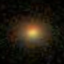

In [28]:
img_id = 300
img_full0[img_id][0]